<a href="https://colab.research.google.com/github/quant-icma/pqf-zhang/blob/main/Copy_of_a1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

Complete the code snippets in a colab notebook. 
Download the notebook file and submit in Blackboard.

## Exercise 1

Complete the code below to plot the intrinsic payoff of a European call option with strike 100
for a the value of the underlying varying from 0 to 200 in steps of size 1.
In the same figure, using Black-Scholes formula with the inputs provided, plot the value of the option for the varying underlying value.

In a second figure, plot the intrinsic payoff and the values function of a European put option with strike 100 with the same parameters.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log


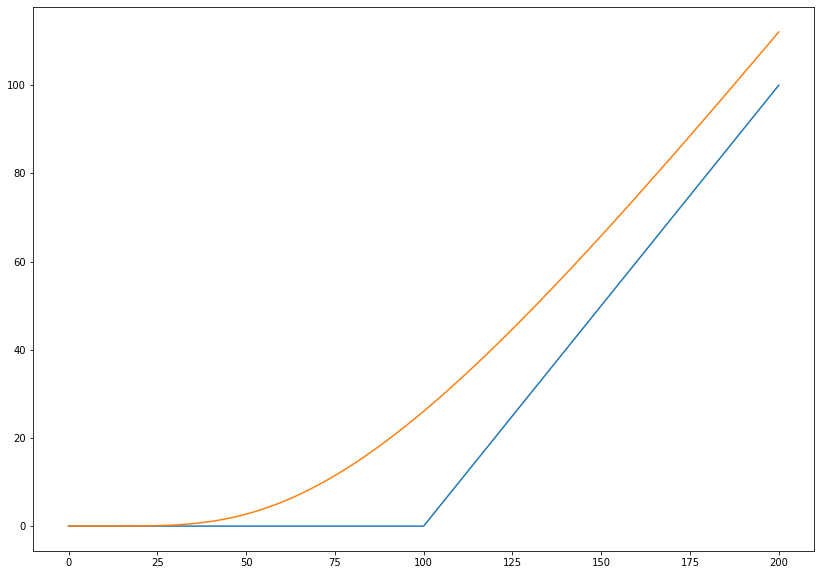

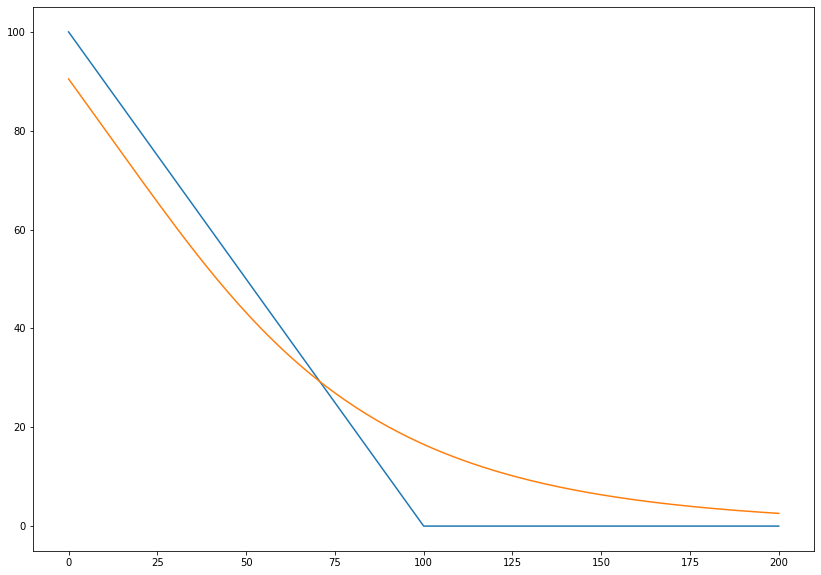

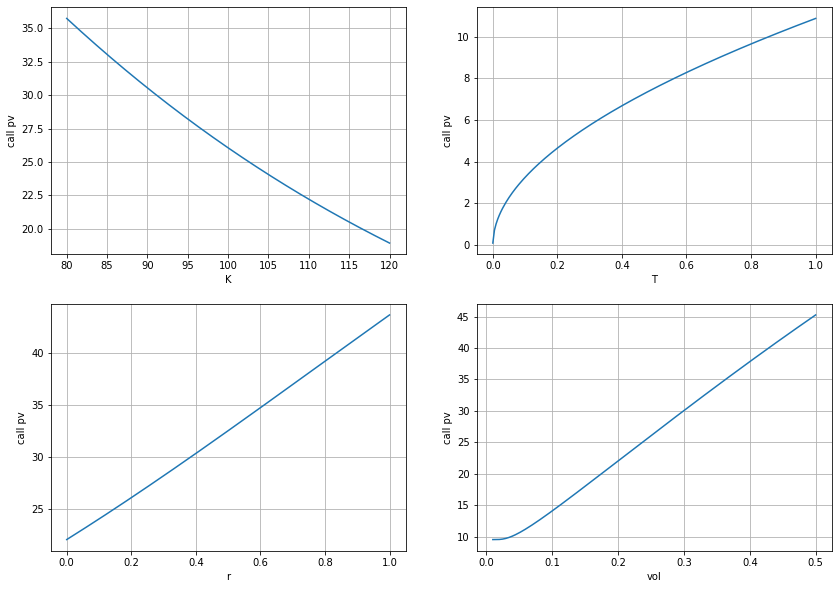

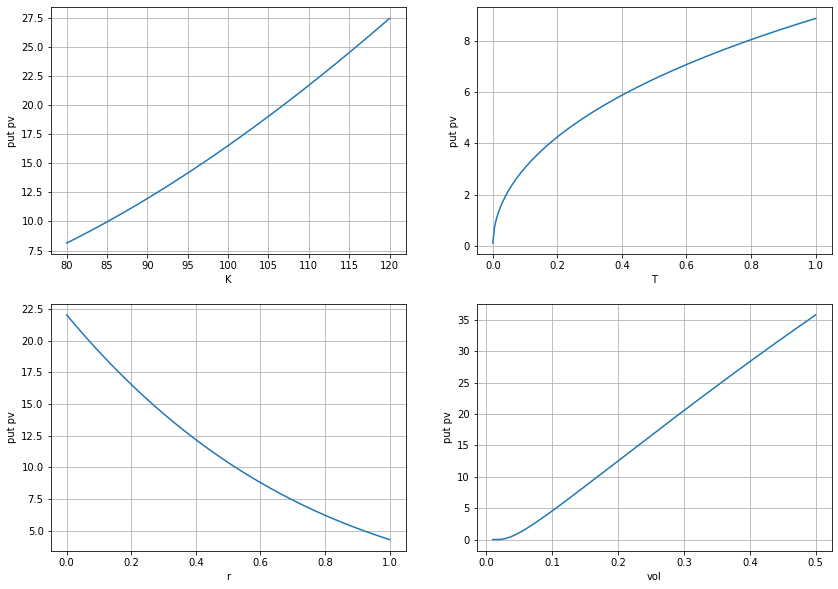

In [ ]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as si
import sympy as sy
from sympy.stats import Normal, cdf
from scipy import stats
plt.rcParams['figure.figsize'] = (14,10)

K = 100
T = 5
r = 0.02
vol = 0.25

def bs_call_value(S, K, T, r, vol):
    '''Computes BSM European call option value'''
    d1 = (np.log(S / K) + (r + 0.5* vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    call = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    return call
    ## write your code here and 
    ## replace the 'pass' by a return statement to return the value
    
    #pass

def bs_put_value(S, K, T, r, vol):
    '''Computes BSM European put option value'''
    d1 = (np.log(S / K) + (r + 0.5* vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    put = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0, 1) - S * si.norm.cdf(-d1,0, 1))
    return put
    ## write your code here and 
    ## replace the 'pass' by a return statement to return the value
    
    #pass

#### Uncomment the line below and change the code to create the grid values of the underlying to use in your plots
S = np.linspace(0, 200, num=201)
xx=np.zeros_like(S.size)
#### Uncomment the line below and complete the code
bs_call_value(S, K, T, r, vol)
call=bs_call_value(S, K, T, r, vol)
call_payoffs = np.maximum(S-K,xx)
call_values = call

#### Uncomment the line below and complete the code
bs_put_value(S, K, T, r, vol)
put=bs_put_value(S, K, T, r, vol)
put_payoffs = np.maximum(K-S,xx)
put_values = put

## Plot call payoff and value functions
## Uncomment the plotting lines and complete
#plt.figure()
#plt.figure()
a1=plt.plot(call_payoffs)
a2=plt.plot(call_values)
plt.show()

## Plot put payoff and value functions
## Uncomment the plotting lines and complete
#plt.figure()
#plt.figure()
b1=plt.plot(put_payoffs)
b2=plt.plot(put_values)
plt.show()

#### END OF EXERCISE
#### YOU DON'T NEED TO CHANGE ANYTHING IN THE REST OF THIS CELL
#### THIS IS JUST FOR YOU TO VISUALIZE THE RESULTS

def plot_function(function, option_type):
    points = 200
    S = 100
    K = 100
    T = 5
    r = 0.02
    vol = 0.25

    fig,ax = plt.subplots(2,2)

    # C(K) plot
    klist = np.linspace(80, 120, points)
    vlist = [function(S, K, T, r, vol) for K in klist]
    ax[0,0].plot(klist, vlist)
    ax[0,0].grid(True)
    ax[0,0].set_xlabel('K')
    ax[0,0].set_ylabel(option_type+' pv')

    # C(T) plot
    tlist = np.linspace(0.0001, 1, points)
    vlist = [function(S, K, T, r, vol) for T in tlist]
    ax[0,1].plot(tlist, vlist)
    ax[0,1].grid(True)
    ax[0,1].set_xlabel('T')
    ax[0,1].set_ylabel(option_type+' pv')

    # C(r) plot
    rlist = np.linspace(0, 0.1, points)
    vlist = [function(S, K, T, r, vol) for r in rlist]
    ax[1,0].plot(tlist, vlist)
    ax[1,0].grid(True)
    ax[1,0].set_xlabel('r')
    ax[1,0].set_ylabel(option_type+' pv')    

    # C(sigma) plot
    slist = np.linspace(0.01, 0.5, points)
    vlist = [function(S, K, T, r, vol) for vol in slist]
    ax[1,1].plot(slist, vlist)
    ax[1,1].grid(True)
    ax[1,1].set_xlabel('vol')
    ax[1,1].set_ylabel(option_type+' pv')    


plot_function(bs_call_value, 'call')
plot_function(bs_put_value, 'put')

# New Section

## Exercise 2

Implement the Black-Scholes-Merton greek formulas below.

# New Section

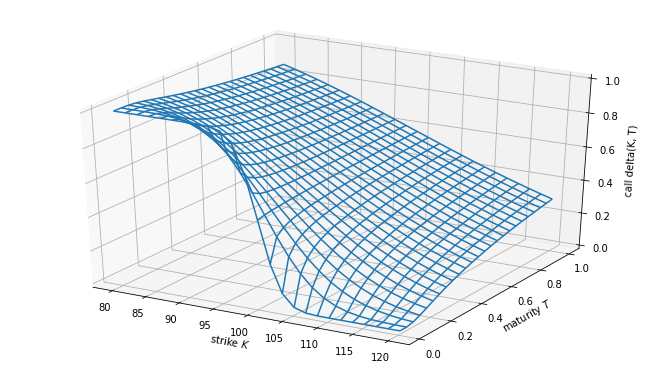

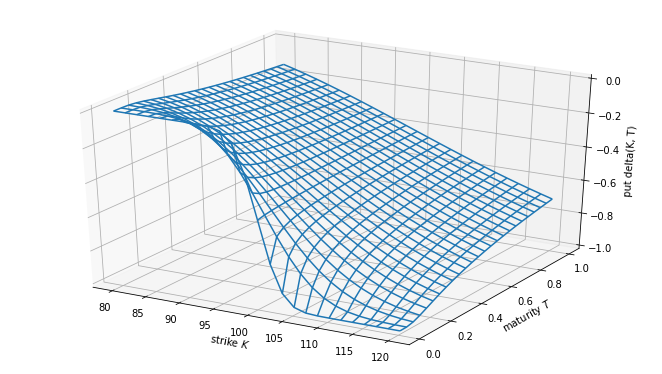

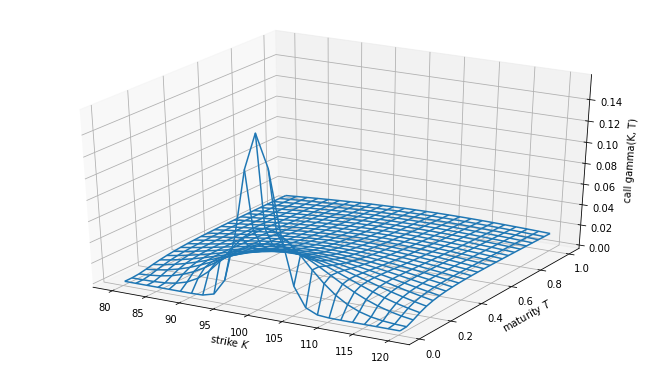

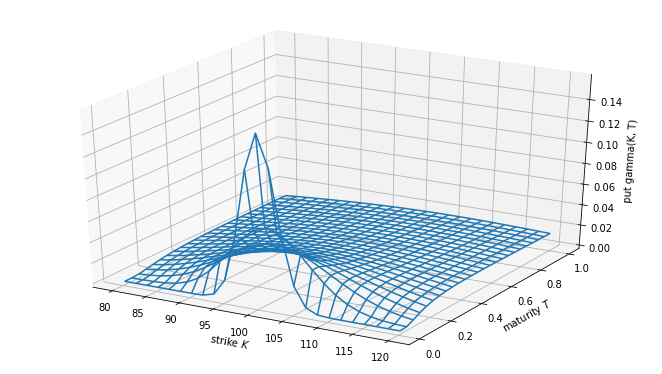

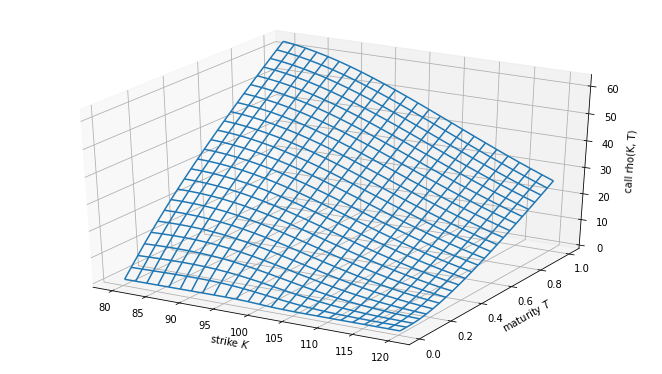

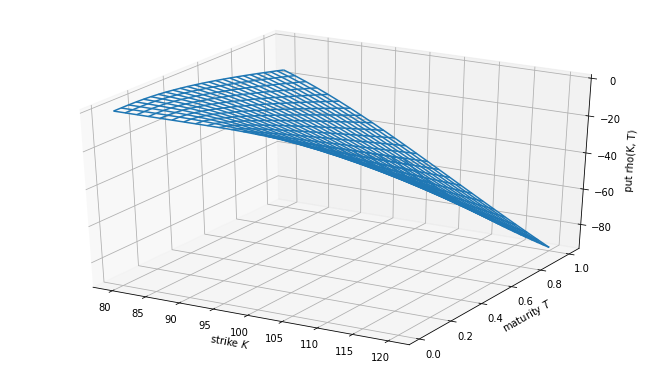

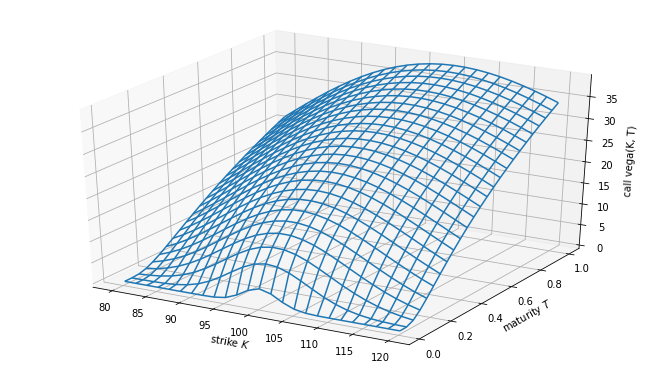

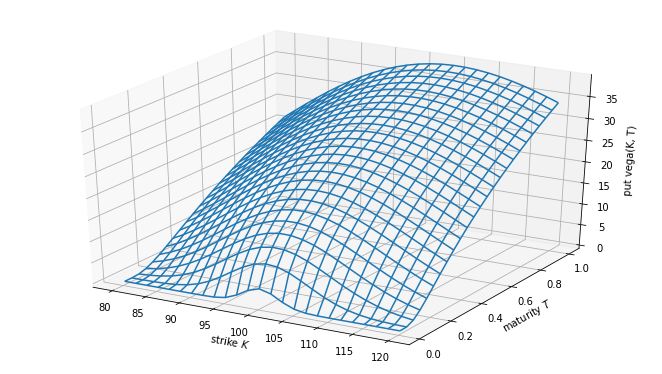

In [ ]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import scipy.stats as si
from scipy import stats

def bs_call_delta(S, K, T, r, vol):
    '''Computes BSM European call option delta'''
    d1 = (np.log(S / K) + (r + 0.5* vol ** 2) * T) / (vol * np.sqrt(T))
    delta = si.norm.cdf(d1, 0.0, 1.0)
    return delta
    ## write your code here and 
    ## replace the 'pass' by a return statement to return the value


def bs_call_gamma(S, K, T, r, vol):
    '''Computes BSM European call option gamma'''
    
    ## write your code here and 
    ## replace the 'pass' by a return statement to return the value
    d1 = (np.log(S / K) + (r + 0.5* vol ** 2) * T) / (vol * np.sqrt(T))
    prob_density = 1 / np.sqrt(2 * np.pi) * np.exp(-d1 ** 2 * 0.5)
    gamma = prob_density / (S * vol * np.sqrt(T))
    return gamma
def bs_call_theta(S, K, T, r, vol):
    '''Computes BSM European call option theta'''
    
    ## write your code here and 
    ## replace the 'pass' by a return statement to return the value
    d1 = (np.log(S / K) + (r + 0.5* vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    prob_density = 1 / np.sqrt(2 * np.pi) * np.exp(-d1 ** 2 * 0.5)
    theta = (-vol * S * prob_density) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    return theta
def bs_call_rho(S, K, T, r, vol):
    '''Computes BSM European call option rho'''
    
    ## write your code here and 
    ## replace the 'pass' by a return statement to return the value
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    rho = T * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    return rho

def bs_call_vega(S, K, T, r, vol):
    '''Computes BSM European call option vega'''
    
    ## write your code here and 
    ## replace the 'pass' by a return statement to return the value
    
    d1 = (np.log(S / K) + (r + 0.5* vol ** 2) * T) / (vol * np.sqrt(T))
    prob_density = 1 / np.sqrt(2 * np.pi) * np.exp(-d1 ** 2 * 0.5)
    vega = S *np.exp(-r * T)* prob_density * np.sqrt(T)
    return vega 

def bs_put_delta(S, K, T, r, vol):
    '''Computes BSM European put option delta'''
    
    ## write your code here and 
    ## replace the 'pass' by a return statement to return the value
    d1 = (np.log(S / K) + (r + 0.5* vol ** 2) * T) / (vol * np.sqrt(T))
    delta = si.norm.cdf(-d1, 0.0, 1.0)
    return -delta

def bs_put_gamma(S, K, T, r, vol):
    '''Computes BSM European put option gamma'''
    
    ## write your code here and 
    ## replace the 'pass' by a return statement to return the value
    d1 = (np.log(S / K) + (r + 0.5* vol ** 2) * T) / (vol * np.sqrt(T))
    prob_density = 1 / np.sqrt(2 * np.pi) * np.exp(-d1 ** 2 * 0.5)
    gamma = prob_density / (S * vol * np.sqrt(T))
    return gamma

def bs_put_theta(S, K, T, r, vol):
    '''Computes BSM European put option theta'''
    
    ## write your code here and 
    ## replace the 'pass' by a return statement to return the value
    d1 = (np.log(S / K) + (r + 0.5* vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    prob_density = 1 / np.sqrt(2 * np.pi) * np.exp(-d1 ** 2 * 0.5)
    theta = (-vol * S * prob_density) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    return theta

def bs_put_rho(S, K, T, r, vol):
    '''Computes BSM European put option rho'''
    
    ## write your code here and 
    ## replace the 'pass' by a return statement to return the value
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    rho = -T * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    return rho

def bs_put_vega(S, K, T, r, vol):
    '''Computes BSM European put option vega'''
    
    ## write your code here and 
    ## replace the 'pass' by a return statement to return the value
    d1 = (np.log(S / K) + (r + 0.5* vol ** 2) * T) / (vol * np.sqrt(T))
    prob_density = 1 / np.sqrt(2 * np.pi) * np.exp(-d1 ** 2 * 0.5)
    vega = S*np.exp(-r * T) * prob_density * np.sqrt(T)
    return vega 


#### END OF EXERCISE
#### YOU DON'T NEED TO CHANGE ANYTHING IN THE REST OF THIS CELL
#### THIS IS JUST FOR YOU TO VISUALIZE THE RESULTS

def plot_greeks(function, greek):
    
    S = 100
    r = 0.02
    vol = 0.25
    
    tlist = np.linspace(0.01, 1, 25)
    klist = np.linspace(80, 120, 25)
    V = np.zeros((len(tlist), len(klist)), dtype=np.float)
    for j in range(len(klist)):
        for i in range(len(tlist)):
            V[i, j] = function(S, klist[j], tlist[i], r, vol)

    # 3D Plotting
    x, y = np.meshgrid(klist, tlist)
    fig = plt.figure(figsize=(9, 5))
    plot = p3.Axes3D(fig)
    plot.plot_wireframe(x, y, V)
    plot.set_xlabel('strike $K$')
    plot.set_ylabel('maturity $T$')
    plot.set_zlabel('%s(K, T)' % greek)

plot_greeks(bs_call_delta, 'call delta')
plot_greeks(bs_put_delta, 'put delta')

plot_greeks(bs_call_gamma, 'call gamma')
plot_greeks(bs_put_gamma, 'put gamma')

plot_greeks(bs_call_rho, 'call rho')
plot_greeks(bs_put_rho, 'put rho')

plot_greeks(bs_call_vega, 'call vega')
plot_greeks(bs_put_vega, 'put vega')
